Вариант 21

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, decomposition, manifold, model_selection
from scipy.spatial.distance import cdist
from sklearn import pipeline, cluster, datasets, mixture, metrics
from itertools import cycle, islice

In [54]:
data = pd.read_excel("./data9/Семинар 9.xlsx", sheet_name=21)[['x1', 'x2']]

x_arr = data['x1'].to_numpy()
q_025 = np.quantile(x_arr, 0.25)
q_075 = np.quantile(x_arr, 0.75)
iqd = q_075-q_025
upper_threshold = q_075+1.5*iqd
lower_threshold = q_025-1.5*iqd
data =  data.loc[(data['x1'] <= upper_threshold) & (data['x1'] >= lower_threshold)]

y_arr = data['x2'].to_numpy()
q_025 = np.quantile(y_arr, 0.25)
q_075 = np.quantile(y_arr, 0.75)
iqd = q_075-q_025
upper_threshold = q_075+1.5*iqd
lower_threshold = q_025-1.5*iqd
data =  data.loc[(data['x2'] <= upper_threshold) & (data['x2'] >= lower_threshold)]

data

,x1,x2
0,-5.474506,0.603054
1,-7.684838,-0.851959
2,-5.828689,0.975688
3,-3.700804,0.242116
4,-5.124122,0.375235
...,...,...
395,5.732781,2.703327
396,5.931407,3.360427
397,3.124441,4.146052
398,3.993295,5.708082


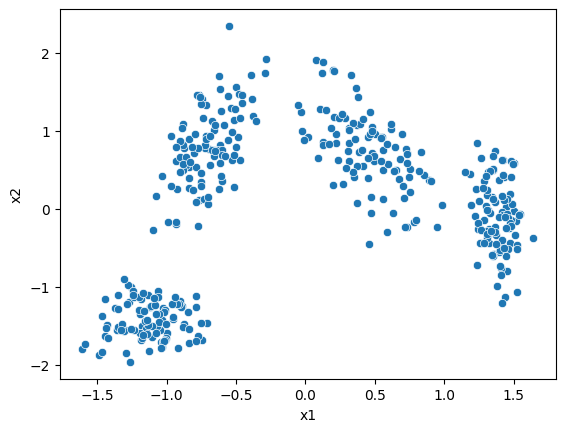

In [55]:
X = preprocessing.StandardScaler().fit_transform(data.to_numpy())
sns.scatterplot(data = pd.DataFrame(data=X, columns=['x1','x2']), x='x1', y='x2')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Centroids stabilized at iteration 5
105 105 400
295 295 400
Centroids stabilized at iteration 7
134 134 400
161 161 400
105 105 400
Centroids stabilized at iteration 9
87 87 400
100 100 400
100 100 400
113 113 400
Centroids stabilized at iteration 15
81 81 400
42 42 400
100 100 400
106 106 400
71 71 400


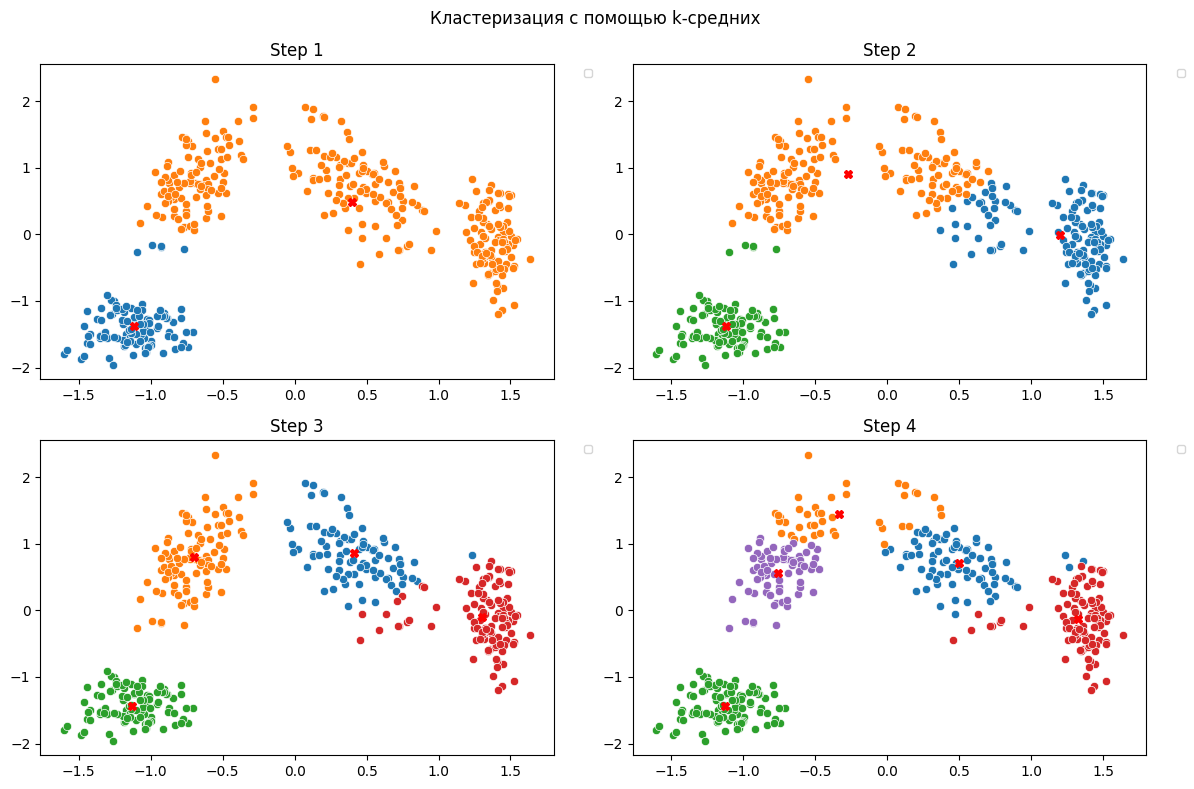

In [56]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8), gridspec_kw={'height_ratios': [1] * 2})
fig.suptitle('Кластеризация с помощью k-средних')
axis_index = 0
for K in range(2,6):
    np.random.seed(seed=42) ## зафиксируем random seed
    centroids = np.random.normal(loc=0.0, scale=.15, size=K*2)
    centroids = centroids.reshape((K, 2)) ## и вот наши центроиды
    cent_history = []
    cent_history.append(centroids)
    converged = False
    for i in range(20):
        distances = cdist(X, centroids)
        labels = distances.argmin(axis=1)
        centroids = centroids.copy()
        for cluster_id in range(K):
            centroids[cluster_id, :] = np.mean(X[labels == cluster_id, :], axis=0)
        if np.diag(cdist(cent_history[-1], centroids)).sum() > 0:
            cent_history.append(centroids)
        else:
            if not converged:
                print(f'Centroids stabilized at iteration {i+1}')
                converged = True
            cent_history.append(centroids)
    ax = axes[axis_index // 2, axis_index % 2]
    distances = cdist(X, cent_history[-1])
    labels = distances.argmin(axis=1)
    for k in range(K):
        print(len(X[labels == k, 0]), len(X[labels == k, 1]), len(labels))
        sns.scatterplot(x=X[labels == k, 0], y=X[labels == k, 1],  
                ax=ax,
                legend="auto"
                )
    ax.plot(cent_history[-1][:, 0], cent_history[-1][:, 1], 'rX')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='x-small')
    ax.set_title('Step {:}'.format(k))
    axis_index += 1
plt.tight_layout()
plt.show()

Максимум силуэта достигается при 3 кластеров


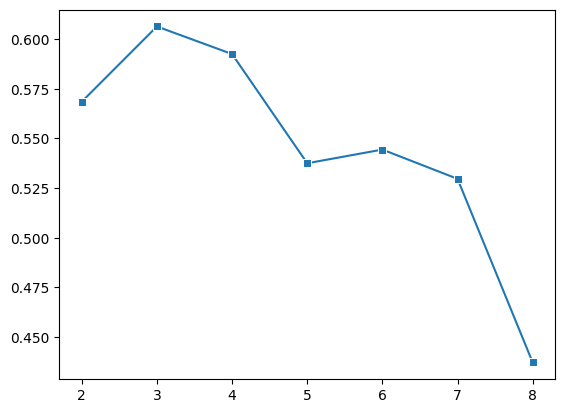

In [57]:
silhouette = []
cluster_num = 0
max_silhouette = 0
for k in range(2, 9, 1):
    algo = cluster.KMeans(n_clusters=k, random_state=1).fit(X)
    silhouette.append(metrics.silhouette_score(X, algo.labels_))
    if max_silhouette < silhouette[-1]: 
        max_silhouette = silhouette[-1]
        cluster_num = k
sns.lineplot(x = range(2, 9, 1), y = silhouette, marker='s')
plt.plot()
print(f'Максимум силуэта достигается при {cluster_num} кластерах')
plt.show()

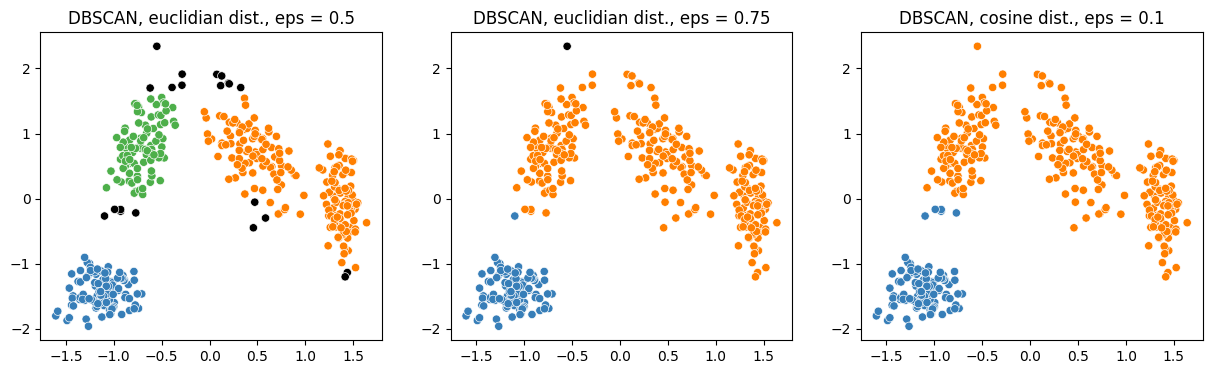

In [58]:
def colorize (labs):
    colors = np.array(list(islice(cycle(
        [
          '#377eb8', '#ff7f00', '#4daf4a', '#f781bf', '#a65628', '#984ea3', '#999999', '#e41a1c', '#dede00'
        ]),
        int(max(labs) + 1))))
    colors = np.append(colors, ["#000000"])
    return colors[labs]

dbscan_cos = cluster.DBSCAN(eps=0.1, min_samples=50, metric = 'cosine')
dbscan_cos.fit(X)
dbscan_euc2 = cluster.DBSCAN(eps=0.5, min_samples=50)
dbscan_euc2.fit(X)
dbscan_euc3 = cluster.DBSCAN(eps=0.75, min_samples=50)
dbscan_euc3.fit(X)
fig, axs = plt.subplots(ncols=3, nrows = 1, figsize=(15, 4))
sns.scatterplot(x = X[:,0], y = X[:,1], c = colorize(dbscan_euc2.labels_), ax = axs[0])
axs[0].set_title('DBSCAN, euclidian dist., eps = 0.5');
sns.scatterplot(x = X[:,0], y = X[:,1], c = colorize(dbscan_euc3.labels_), ax = axs[1])
axs[1].set_title('DBSCAN, euclidian dist., eps = 0.75');
sns.scatterplot(x = X[:,0], y = X[:,1], c = colorize(dbscan_cos.labels_), ax = axs[2])
axs[2].set_title('DBSCAN, cosine dist., eps = 0.1')
plt.show()